In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [3]:
e_commerce=pd.read_fwf('test.ft.txt')

In [4]:
e_commerce

,label,Review
0,__label__2,One of the best game music soundtracks - for a...
1,__label__1,Batteries died within a year ...: I bought thi...
2,__label__2,"works fine, but Maha Energy is better: Check o..."
3,__label__2,Great for the non-audiophile: Reviewed quite a...
4,__label__1,DVD Player crapped out after one year: I also ...
...,...,...
13906,__label__1,What a waste of perfectly good trees.: I've re...
13907,__label__1,product showed up water damaged: I would not b...
13908,__label__2,Wonderful Book: I have read other reviews on a...
13909,__label__2,"Excellent almost real sci-fi: Sure, some spots..."


In [5]:
e_commerce.drop('label',axis=1)

,Review
0,One of the best game music soundtracks - for a...
1,Batteries died within a year ...: I bought thi...
2,"works fine, but Maha Energy is better: Check o..."
3,Great for the non-audiophile: Reviewed quite a...
4,DVD Player crapped out after one year: I also ...
...,...
13906,What a waste of perfectly good trees.: I've re...
13907,product showed up water damaged: I would not b...
13908,Wonderful Book: I have read other reviews on a...
13909,"Excellent almost real sci-fi: Sure, some spots..."


In [6]:
e_commerce = [x.strip() for x in e_commerce.Review]
e_commerce = [x for x in e_commerce if x]
e_commerce[0:10]

["One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting. But even if those weren't included I would still consider the collection worth it.",
 'Batteries died within a year ...: I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the batteries w

In [7]:
import spacy

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
from nltk import tokenize
sentences =tokenize.sent_tokenize(" ".join(e_commerce))

In [10]:
sentences

["One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums.",
 'There is an incredible mix of fun, epic, and emotional songs.',
 "Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks.",
 'I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting.',
 "But even if those weren't included I would still consider the collection worth it.",
 'Batteries died within a year ...: I bought this charger in Jul 2003 and it worked OK for a while.',
 'The design is nice and convenient.',
 'However, after about

In [11]:
df=pd.DataFrame(sentences,columns=['sentence'])

In [12]:
df

,sentence
0,One of the best game music soundtracks - for a...
1,"There is an incredible mix of fun, epic, and e..."
2,Those sad and beautiful tracks I especially li...
3,I must admit that one of the songs (Life-A Dis...
4,But even if those weren't included I would sti...
...,...
67508,"Such as laser engine drives, or optical storag..."
67509,"So believable, in fact I am not surprised when..."
67510,God-Awful Movie: Read the novel by Richard Mat...
67511,This movie is far too Hollywood and does nothi...


In [16]:
afinn_p = pd.read_csv("positive-words.txt",sep=';', encoding='latin-1')
afinn_p=afinn_p.iloc[:,0]
afinn_p.dropna(inplace=True)
afinn_p=afinn_p.reset_index()
afinn_p['value']=1
afinn_p.drop(['index'],axis=1,inplace=True)
afinn_p.columns=['words','value']
afinn_p

,words,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [17]:
afinn_n = pd.read_csv("negative-words.txt",sep=';', encoding='latin-1')
afinn_n=afinn_n.iloc[:,0]
afinn_n.dropna(inplace=True)
afinn_n=afinn_n.reset_index()
afinn_n['value']=-1
afinn_n.drop(['index'],axis=1,inplace=True)
afinn_n.columns=['words','value']
afinn_n

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [18]:
affin_df=pd.concat([afinn_n,afinn_p],ignore_index=True)

In [19]:
affin_df

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
6784,youthful,1
6785,zeal,1
6786,zenith,1
6787,zest,1


In [20]:
affinity_scores = affin_df.set_index('words')['value'].to_dict()

In [21]:
affinity_scores

{'2-faced': -1,
 '2-faces': -1,
 'abnormal': -1,
 'abolish': -1,
 'abominable': -1,
 'abominably': -1,
 'abominate': -1,
 'abomination': -1,
 'abort': -1,
 'aborted': -1,
 'aborts': -1,
 'abrade': -1,
 'abrasive': -1,
 'abrupt': -1,
 'abruptly': -1,
 'abscond': -1,
 'absence': -1,
 'absent-minded': -1,
 'absentee': -1,
 'absurd': -1,
 'absurdity': -1,
 'absurdly': -1,
 'absurdness': -1,
 'abuse': -1,
 'abused': -1,
 'abuses': -1,
 'abusive': -1,
 'abysmal': -1,
 'abysmally': -1,
 'abyss': -1,
 'accidental': -1,
 'accost': -1,
 'accursed': -1,
 'accusation': -1,
 'accusations': -1,
 'accuse': -1,
 'accuses': -1,
 'accusing': -1,
 'accusingly': -1,
 'acerbate': -1,
 'acerbic': -1,
 'acerbically': -1,
 'ache': -1,
 'ached': -1,
 'aches': -1,
 'achey': -1,
 'aching': -1,
 'acrid': -1,
 'acridly': -1,
 'acridness': -1,
 'acrimonious': -1,
 'acrimoniously': -1,
 'acrimony': -1,
 'adamant': -1,
 'adamantly': -1,
 'addict': -1,
 'addicted': -1,
 'addicting': -1,
 'addicts': -1,
 'admonish': -1

In [22]:
import en_core_web_sm

In [23]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(Reviews: str = None):
    sent_score = 0
    if Reviews:
        sentence = nlp(Reviews)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [24]:
#!python -m spacy download en_core_web_sm

In [25]:
df['sentiment_value'] = df['sentence'].apply(calculate_sentiment)

In [26]:
df

,sentence,sentiment_value
0,One of the best game music soundtracks - for a...,5
1,"There is an incredible mix of fun, epic, and e...",2
2,Those sad and beautiful tracks I especially li...,1
3,I must admit that one of the songs (Life-A Dis...,-3
4,But even if those weren't included I would sti...,1
...,...,...
67508,"Such as laser engine drives, or optical storag...",0
67509,"So believable, in fact I am not surprised when...",1
67510,God-Awful Movie: Read the novel by Richard Mat...,1
67511,This movie is far too Hollywood and does nothi...,1


In [27]:
df[df.sentiment_value>5]

,sentence,sentiment_value
502,We found that for our 1 year old it was pretty...,7
552,They want to do something different and in my ...,6
779,"excellent: Good price, excellent design and sh...",6
1008,Nice but Sony must give us more info: This is ...,8
1185,This cd is really good and I would hope the wo...,6
...,...,...
65605,Good movie worth the buy: I saw training day i...,12
66202,again not a kid but love black metal: this has...,7
66562,The delightfully catchy ditty gives the listen...,9
66623,"Reacher, one of the most popular characters in...",6


In [28]:
df[df.sentiment_value<0]

,sentence,sentiment_value
3,I must admit that one of the songs (Life-A Dis...,-3
12,Great for the non-audiophile: Reviewed quite a...,-1
15,DVD Player crapped out after one year: I also ...,-3
18,To me that's a sign on bad quality.,-1
21,"Incorrect Disc: I love the style of this, but ...",-1
...,...,...
67491,: I've read a lot of science fiction books ove...,-2
67495,Somewhere an English teacher weeps.,-1
67496,"Also, the story (if you can call it that) viol...",-1
67498,product showed up water damaged: I would not b...,-3


In [29]:
df['word count']=df['sentence'].str.split().apply(len)

In [30]:
df

,sentence,sentiment_value,word count
0,One of the best game music soundtracks - for a...,5,58
1,"There is an incredible mix of fun, epic, and e...",2,11
2,Those sad and beautiful tracks I especially li...,1,24
3,I must admit that one of the songs (Life-A Dis...,-3,41
4,But even if those weren't included I would sti...,1,14
...,...,...,...
67508,"Such as laser engine drives, or optical storag...",0,11
67509,"So believable, in fact I am not surprised when...",1,24
67510,God-Awful Movie: Read the novel by Richard Mat...,1,15
67511,This movie is far too Hollywood and does nothi...,1,13


In [31]:
df.sort_values('sentiment_value').tail(10)

,sentence,sentiment_value,word count
66562,The delightfully catchy ditty gives the listen...,9,63
23646,grand daughter loved it: gand daughter loved i...,9,117
67224,: For those managers who are looking for a cle...,9,93
62575,"Refreshing beauty: A beautiful CD, with freshn...",9,38
19063,"If you like that sort of thing, fine, but in m...",9,34
13756,"Third and other streams: Well, since other jaz...",10,78
65605,Good movie worth the buy: I saw training day i...,12,170
2628,Not speaking abut the phantastic show... North...,12,100
25928,"A strong compliment, but Eliot shows that she ...",12,90
23126,From jazz to eternity: Starting with some hot ...,12,153


In [32]:
df['sentiment_value'].describe()

count    67513.000000
mean         0.295395
std          1.369311
min        -13.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         12.000000
Name: sentiment_value, dtype: float64

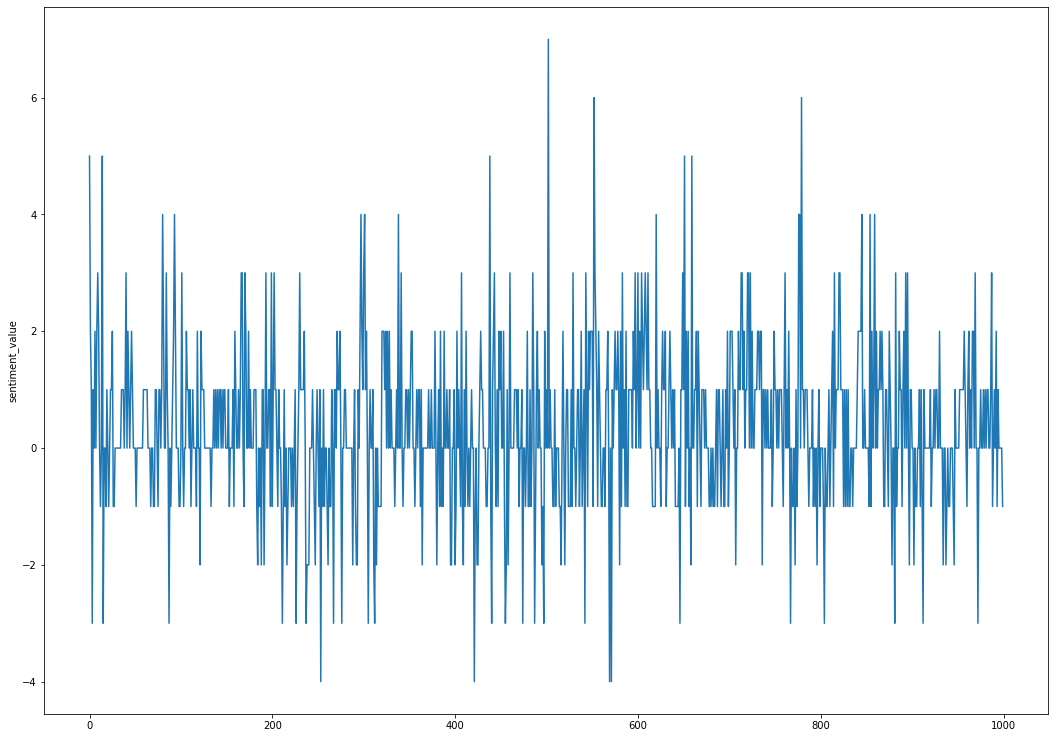

In [33]:
plt.figure(figsize=(18, 13))
sns.lineplot(y=df['sentiment_value'].head(1000),x=range(1000))

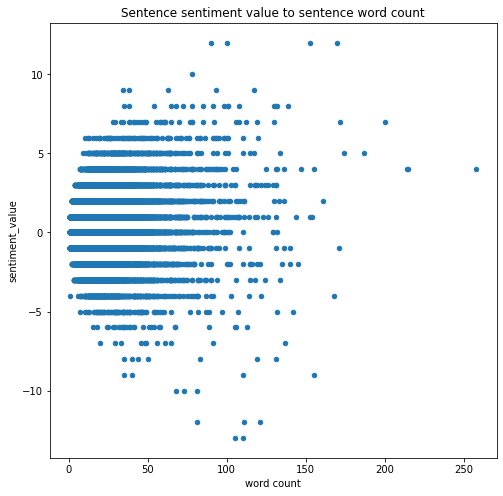

In [34]:
df.plot.scatter(x='word count', y='sentiment_value', figsize=(8,8), 
                     title='Sentence sentiment value to sentence word count')